# <H1 style="text-align: center;"><b>K-Means Clustering</b></p>

## Introducción a K-Means Clustering

### ¿Qué es K-Means?

**K-Means** es un algoritmo de **aprendizaje no supervisado** utilizado para agrupar datos en **\( k \)** conjuntos o clusters. Su objetivo es minimizar la variabilidad dentro de cada cluster, asegurando que los puntos dentro de un grupo sean lo más similares posible.

---

### ¿Cómo funciona K-Means?

El algoritmo sigue estos pasos iterativos:

1. **Inicialización:**  
   - Se eligen aleatoriamente \( k \) centroides dentro del espacio de datos.  

2. **Asignación de puntos:**  
   - Cada punto se asigna al **centroide más cercano** (según una métrica de distancia, como la euclidiana).  

3. **Recalculación de centroides:**  
   - Se actualizan los centroides tomando el **promedio de todos los puntos** asignados a cada cluster.  

4. **Repetición:**  
   - Se repiten los pasos 2 y 3 hasta que los centroides dejan de cambiar significativamente o se alcanza un número máximo de iteraciones.  

---


In [3]:
# Cargamos librerias y datos
import pandas as pd
import kmeans
import graphers as grph
import metric
import analytics

data_3d = pd.read_csv("data/data_3d.csv")
data_2d = pd.read_csv("data/data_2d.csv")

In [ ]:
# Estudio estadistico 2D
print("Estudio estadistico de los datos 2D:")
print(data_2d.describe())

Estudio estadistico de los datos 2D:
                x           y      label
count  500.000000  500.000000  500.00000
mean    -0.021084   -0.018481    3.00000
std      2.709409    2.739144    1.41563
min     -4.583528   -4.136309    1.00000
25%     -2.881481   -2.852890    2.00000
50%      0.063694   -0.063037    3.00000
75%      2.794664    2.877321    4.00000
max      4.166031    4.479313    5.00000


In [5]:
# Estudio estadistico 3D

print("Estudio estadistico de los datos 3D:")
print(data_3d.describe())

Estudio estadistico de los datos 3D:
                x           y           z      label
count  500.000000  500.000000  500.000000  500.00000
mean     0.007135    0.012954    1.210683    3.00000
std      2.767796    2.706724    1.549598    1.41563
min     -4.076058   -4.533494   -1.900689    1.00000
25%     -2.846464   -2.810216   -0.068054    2.00000
50%      0.025454    0.098319    0.415523    3.00000
75%      2.903804    2.814452    2.868339    4.00000
max      4.058567    4.185694    4.135517    5.00000


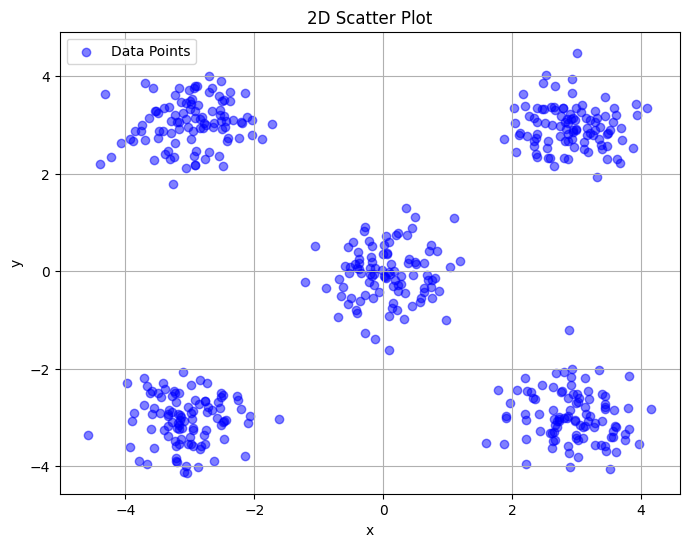

In [ ]:
# Grafica de los datos 2D
grph.scatter_2d(data_2d)

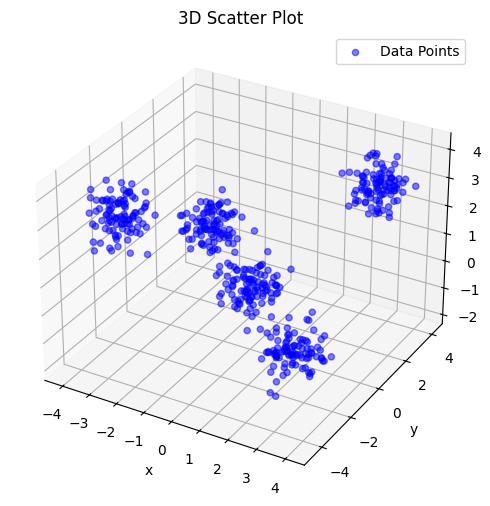

In [8]:
# Grafica de los datos 3D
grph.scatter_3d(data_3d)

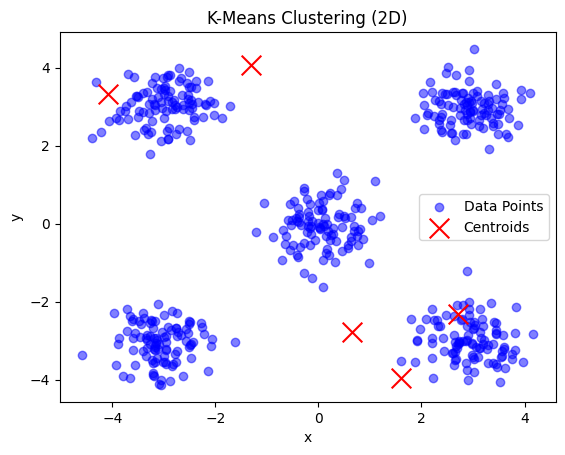

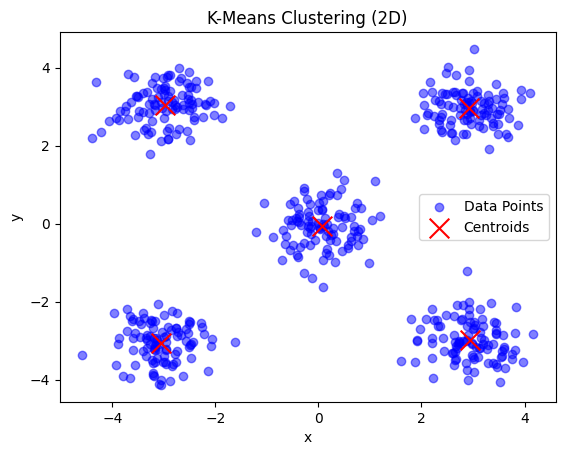

In [ ]:
# Implementacion de K-Means en los datos 2D
k = 5
seed = 42
metrica = metric.euclidean

init_centroids = kmeans.centroids(data_2d, k, seed)
centroids, clusters = kmeans.Kmeans(data_2d, k, metrica, seed)  # Ahora obtenemos clusters
grph.plot_2d(data_2d, init_centroids)
grph.plot_2d(data_2d, centroids)

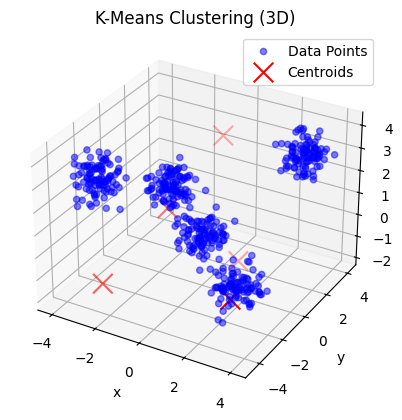

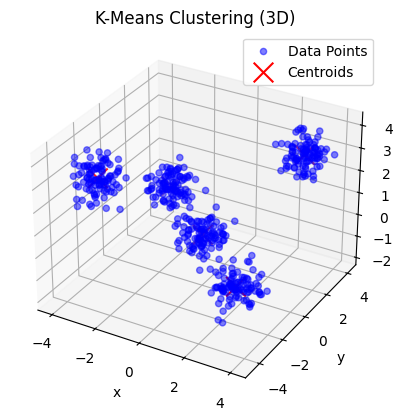

In [11]:
# Implementacion de K-Means en los datos 3D
k = 5
seed = 42
metrica = metric.euclidean

init_centroids = kmeans.centroids(data_3d, k, seed)
centroids, clusters = kmeans.Kmeans(data_3d, k, metrica, seed)  # Ahora obtenemos clusters
grph.plot_3d(data_3d, init_centroids)
grph.plot_3d(data_3d, centroids)